In [1]:
"""Data transformation for UK LSE data with Yahoo Finance.

This script transforms the following data
- Price data
- Risk-free bond data (using Monthly average SONIA rate)

It is designed to be not following functional form or
objective orientated form to experiment different data
manipulations in notebooks easily.

All final data will be stored in a dictionary called `final`
"""
# library
from datetime import timedelta

import numpy as np
import pandas as pd
from common_etl import missing_code

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# storing transformed data
# file path
price_path = "~/db/asset_pricing/yfinance/1mo.csv"
risk_path = "~/db/asset_pricing/IUMASOIA.csv"

# date range
min_date = "2000-01-01"
max_date = "2022-03-01"

In [2]:
"""Risk free rate"""
sonia = pd.read_csv(risk_path)

sonia.columns = ["date", "SONIA"]
sonia["date"] = pd.to_datetime(sonia["date"])

sonia.head()

,date,SONIA
0,2022-02-28,0.4199
1,2022-01-31,0.1958
2,2021-12-31,0.1141
3,2021-11-30,0.0468
4,2021-10-31,0.0502


,SONIA,SONIA_return
date,,
2000-01-31,5.3527,NaN
2000-02-29,5.8408,0.087267
2000-03-31,5.7620,-0.013583
2000-04-30,5.9347,0.029532
2000-05-31,5.9122,-0.003798


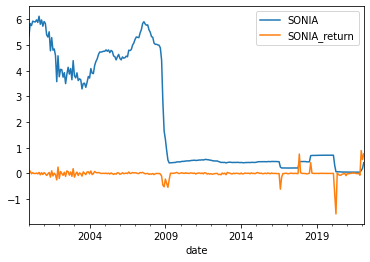

In [3]:

# compute risk free returns
sonia = sonia.set_index("date")\
    .sort_values(by="date")\
    .astype("float")
sonia["SONIA_return"] = np.log(sonia["SONIA"])\
    - np.log(sonia["SONIA"].shift(1))

# large spikes correspond to financial crisis
sonia.plot()

sonia.head()

In [4]:
"""Price data"""
headers = ["date", "open", "high",
           "low", "close", "adj_close", "volume", "symbol"]
raw = pd.read_csv(price_path, header=None)\
        .dropna(axis=0)
raw.columns = headers
raw["date"] = pd.to_datetime(raw["date"]) - timedelta(days=1)
raw["symbol"] = raw.loc[:, "symbol"].str.replace(".L", "", regex=False)

raw[raw.loc[:, "symbol"] == "3IN"]

,date,open,high,low,close,adj_close,volume,symbol
0,2007-02-28,140.740601,144.226807,136.870300,142.147995,86.581375,20705141.0,3IN
1,2007-03-31,141.796204,143.907303,135.462906,140.740601,85.724159,11498548.0,3IN
2,2007-04-30,140.388794,145.314697,139.333206,144.610992,88.081581,6343479.0,3IN
3,2007-05-31,144.962906,146.116898,140.740601,142.851700,87.010002,5760350.0,3IN
4,2007-06-30,143.555405,143.555405,139.264297,140.036896,85.295525,6216603.0,3IN
5,2007-07-31,138.629501,140.740601,132.296204,138.981400,84.652649,11170907.0,3IN
6,2007-08-31,139.333206,145.666595,137.925797,143.907303,87.652969,46075819.0,3IN
7,2007-09-30,142.851700,150.592499,140.740601,146.370300,89.153175,17032412.0,3IN
8,2007-10-31,146.370300,149.185104,143.907303,149.185104,90.867653,10988465.0,3IN
9,2007-11-30,147.074005,150.592499,144.962906,147.777695,90.010391,7621428.0,3IN


In [5]:
symbols = raw["symbol"].unique()
time_index = pd.date_range(
    start=min_date,
    end=max_date,
    freq="M"
)
index = pd.MultiIndex.from_product(
    [symbols, time_index], names=["symbol", "date"]
)
data = raw.loc[raw["date"] != "2022-03-15"]\
    .set_index(["symbol", "date"])\
    .sort_values(by=["symbol", "date"])\
    .groupby("symbol")\
    .apply(lambda x: np.log(x) - np.log(x.shift(1)))\
    .combine_first(sonia)\
    .reindex(index)

data.loc["3IN"]

/home/ling/miniconda3/envs/ap_tf2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ling/miniconda3/envs/ap_tf2/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,SONIA,SONIA_return,adj_close,close,high,low,open,volume
date,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# compute excess returns
for col in ["close", "high", "low", "open", "adj_close"]:
    data.loc[:, col + "_excess"] = data.loc[:, col] - \
        data.loc[:, "SONIA_return"]

data.loc["3IN"]

,SONIA,SONIA_return,adj_close,close,high,low,open,volume,close_excess,high_excess,low_excess,open_excess,adj_close_excess
date,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='symbol,date'>

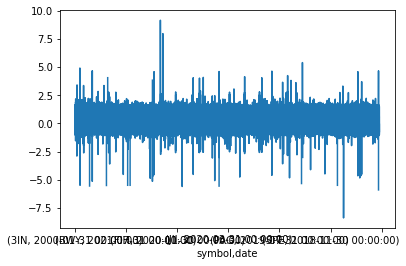

In [7]:
# export data
final = data.loc[:, "adj_close_excess"]\
        .fillna(missing_code)\
        .astype("float")
final.to_csv("../data/yprice_1mo.csv")

final.replace(missing_code, None).plot()